
# **COMP718 - Quantum Computing**
# **Topic: Application of the Variational Quantum Eigensolver in Quantum Chemistry**

__Group Members:__


*   Thalente
*   Yurvan
*   Dylan
*   Vuyo


# **0. Installations**

In [ ]:
%%capture
!pip install pennylane
!pip install tabulate

# **1. Introduction**

## **1.1 What is a Quantum Computer?**

A quantum computer is a new and fundamentally different type of device that operates according to the laws of quantum physics. On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware. Currently, research and development of such devices is still in its infant stage, facing numerous challenges that must be addressed before we can achieve a fully functioning quantum computer.

## **1.2 What is a Quantum System?**

Quantum systems are very delicate systems, making them susceptible to small disturbances (perturbations) from both the external environment and even from within the system itself. One of the primary challenges physicists face in developing quantum computers is the *Decoherence Problem*. It is a fact that the decoherence will take place because the quantum system is never isolated; any quantum experiments or measurements occurring will always be done within some particular environment.


> *Decoherence* is the means by which the environment surrounding a quantum system interacts with it.





Currently there are quantum algorithms that are designed to test the potentiality of quantum computers thst we have, these quantum computers they are still affected by noise, they are in a stage called the NISQ (Noisy Intermediate-Scale Quantum) Era. One of the well known NISQ algorithms are the:

1. **Variational Quantum Eigensolver algorithm (VQE)**
2. **Quantum Approximate Optimization Algorithm (QAOA)**

Within the research community, these algorithms are known as *Hybrid Algorithms*. Our main focus here will be to study the VQE algorithm. The main benefit of VQE is that it requires relatively shallow quantum circuits and thus it can be sucessfully executed on NISQ computers.

> *Hybrid Algorithms* utilize both Quantum Computers and Classical Computers in their calculations.



# **2. The Variational Principle**

In Quantum Mechanics, the *Variational Method* is one way of finding approximations to the LOWEST Energy Eigenstate or Ground State, and some Excited States.

Let us consider a system desribed by the hamiltonian $H$, which contain complete sets of orthonomal eigenstates $u_1, u_2, ..., u_n$  and their corresponding eigenvalues $E_1, E_2, ..., E_n$  ordered in increasing sequence, i.e.,

- $E_1\le E_2≤ ...\le E_n$.               (1)


We can expand any state of the system in terms of these eigenstates

- $\psi=\sum\nolimits_{n=1}^∞ c_nu_n$          (2)

where  $c_n$ is a complex number.

The Expectation Value of the energy in the state is then given by

- $\frac{\langle\psi|H|\psi\rangle}{\langle\psi|\psi\rangle}=\frac{\sum\nolimits_{n=1}^∞ |c_n|^2E_n}{\sum\nolimits_{n=1}^∞ |c_n|^2}$.      (3)

From (1), we have $E_n\ge E_1 $  for all $n$, therefore we obtain

- $\frac{\langle\psi|H|\psi\rangle}{\langle\psi|\psi\rangle}\ge E_1$    (4)

Equation (4) states that the Expectation Value of $H$ for any normalized state is an UPPER BOUND of the Ground State Energy $E_1$. This then forms the basis for the approximate calculations of the Ground State Energy.

We choose a trial wave function $\psi _T$, which depends on some parameters - $\theta_1,\theta _2 ,..., \theta_k$,

- $\psi _T=\psi _T(\theta_1, \theta _2, ...,\theta_k)$    (5)

and compute

- $E(\theta_1, \theta _2, ...,\theta_k)=\frac{\langle\psi_T|H|\psi_T\rangle}{\langle\psi_T|\psi_T\rangle}$.                            (6)

We then minimise $E(\theta_1, \theta _2, ...,\theta_k)$ with respect to the variational parameters $\theta_1,\theta _2 ,..., \theta_k$ by solving the equation

- $\frac{∂E(\theta_1, \theta _2, ...,\theta_k)}{∂\theta_i}=0,$     $i=1,...,k$.

The resulting minimum value of $(\theta_1, \theta _2, ...,\theta_k)$  represents the **best estimate** of the Ground State of the Trial Wave Function.

Hence we obtain an **upper bound** of the Ground State Energy.

The **lowest bound** that we obtain is **always** the **best** to choose.

Picking the best trial wave function to work with is always the challenging part of the process, hence we must choose the trial wave function with the correct qualitative features of the state of our given hamiltonian.

# **3. History of VQE**


The first author to write a paper on the variational quantum eigensolver algorithm was Alberto Peruzzo shown in Fig 1 below. The paper was published on Nature Communications on the 12th of July 2014.



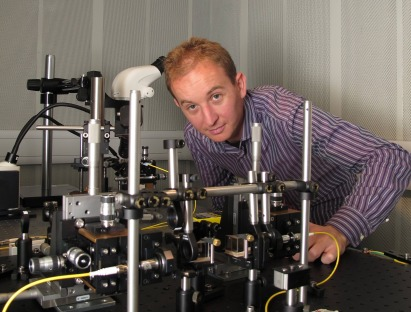


**Figure 1**: A  photo of Alberto Peruzzon in his lab.

The goal was to find the minimum eigenvalue of a particular Hamiltonian using a quantum algorithm, in his case he (with his research colleagues) were working on determining the ground-state of a molecule. There was already a well-known algorithm for computing the eigenvalues of a Hermitian matrix: the *Quantum Phase Estimation (QPE)algorithm*. While QPE can find the eigenvalues of a Hamiltonian, it still requires a fully *coherent evolution*.

Peruzzo successfully demonstrated an alternative algorithm called the Variational Quantum Eigensolver (__VQE__), which significantly reduced the requirements for coherent evolution. He then implemented this algorithm by combining a highly reconfigurable photonic quantum processor with a conventional computer. His approach successfully demonstrated the feasibility of this approach with an example from quantum chemistry by calculating the ground-state of the helium-hydride (He$^+$-H) ion.

Although this algorithm is still relatively new, it is gaining traction rapidly within the research community due to its advantages over other hybrid algorithms. It appears to perform especially well in simulating small molecules, like the one mentioned above that Peruzzo studied.

# **4. Advantages & Disdadvantages of VQE**


Just like most aglorithms, the VQE has its own strengths and weaknesses. Below is a list of major advantages and disadvantages of the VQE.

__Advantages of VQE:__


1.   Unlike QPE, VQE can run on NISQ hardware.
2.   Ansatzes are relatively shallow quantum circuits, which allow Quantum Error Mitigation (QEM) methods to be applied to the results.
3.   Problems unrelated to quantum chemistry can be expressed as Hamiltonians, giving VQE considerable versatility. An example of such well-known problems is solving a system of linear equations, $Ax=b$ ---- where we applied a modified version of the VQE, the Variational Quantum Linear Solver.


__Disadvantages of VQE:__


1.   The number of measurements required to conclude the value of ground state is higher compared to the QPE and scales approximately with the number of terms in the Hamiltonian.
2.   The VQE is a heuristic method and thus does not guarantee convergence to the ground state value. The method is highly influenced by the choice of ansatz circuit and the optimization methods.


# **5. Summary of VQE**

The VQE algorithm can be summarized in the following steps:

1. **Initialization**: Choose a parameterized quantum circuit(ansatz) and initialize the parameters.

2. **State Preparation**: Use the quantum circuit with the current parameters to prepare a quantum state.

3. **Measurement**: Measure the expectation value of the Hamiltonian on the prepared quantum state.

4. **Optimization**: Use a classical optimizer to update the parameters based on the measurement results.

5. **Iteration**: Repeat steps until convergence is achieved, i.e., the expectation value of the Hamiltonian is minimized.

Below is a schematics diagram of the flow of the algorithm.

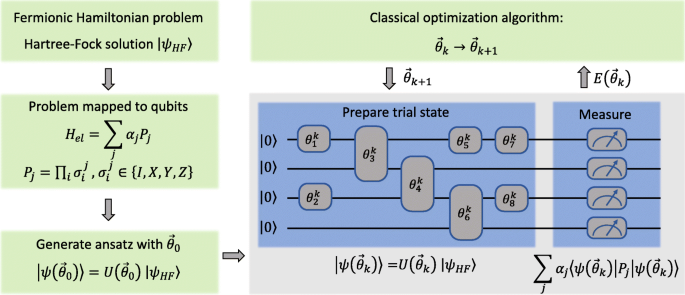

# **6. Quantum Eigenvector Preparation Algorithm**

1. Design a quantum circuit, controlled by a set of
experimental parameters $\theta_i$, which can prepare
a class of states. Using this device, prepare the initial state $|\psi^0\rangle$and define the objective function $C(\theta_i)=\langle\psi(\theta_i)|H|\psi(\theta_i)\rangle$, which efficiently maps the set of experimental parameters to the expectation value of the Hamiltonian and is computed in a quantum part. $n$ denotes the current iteration of the aglorithm.

2. Let $n=0$

3. Repeat until optimization is completed in a classical part

  (a) Call Algorithm in quantum part with $\theta_i$ as input:

  (a.1) Using the QPU (Quantum Processing Unit), compute $\langle\sigma_α^i\rangle$, $\langle\sigma_α^i\sigma_β^j\rangle$, $\langle\sigma_α^i\sigma_β^jσ_γ^k\rangle$, ..., on $|\psi^n\rangle$ for all terms of $H$.

  (a.2) Classically sum on CPU (Classical Prosessing Unit) the values from the QPU with their appropriate weight, $h$, to obtain $C(\theta_i)$.
  
  (b) Feed $C(\theta_i)$ to the classical minimization algorithm (e.g. gradient descent or Nelder-Mead Simplex method), and aloow it to determine $\theta_i^{n+1}$.

# **7. Implementation**

## **7.1 Building the Electronic Hamiltonian**

The first step is to specify the molecule we want to simulate. We will use the electronic Hamiltonian of the Helium Hydride Ion, $He-H^+$.

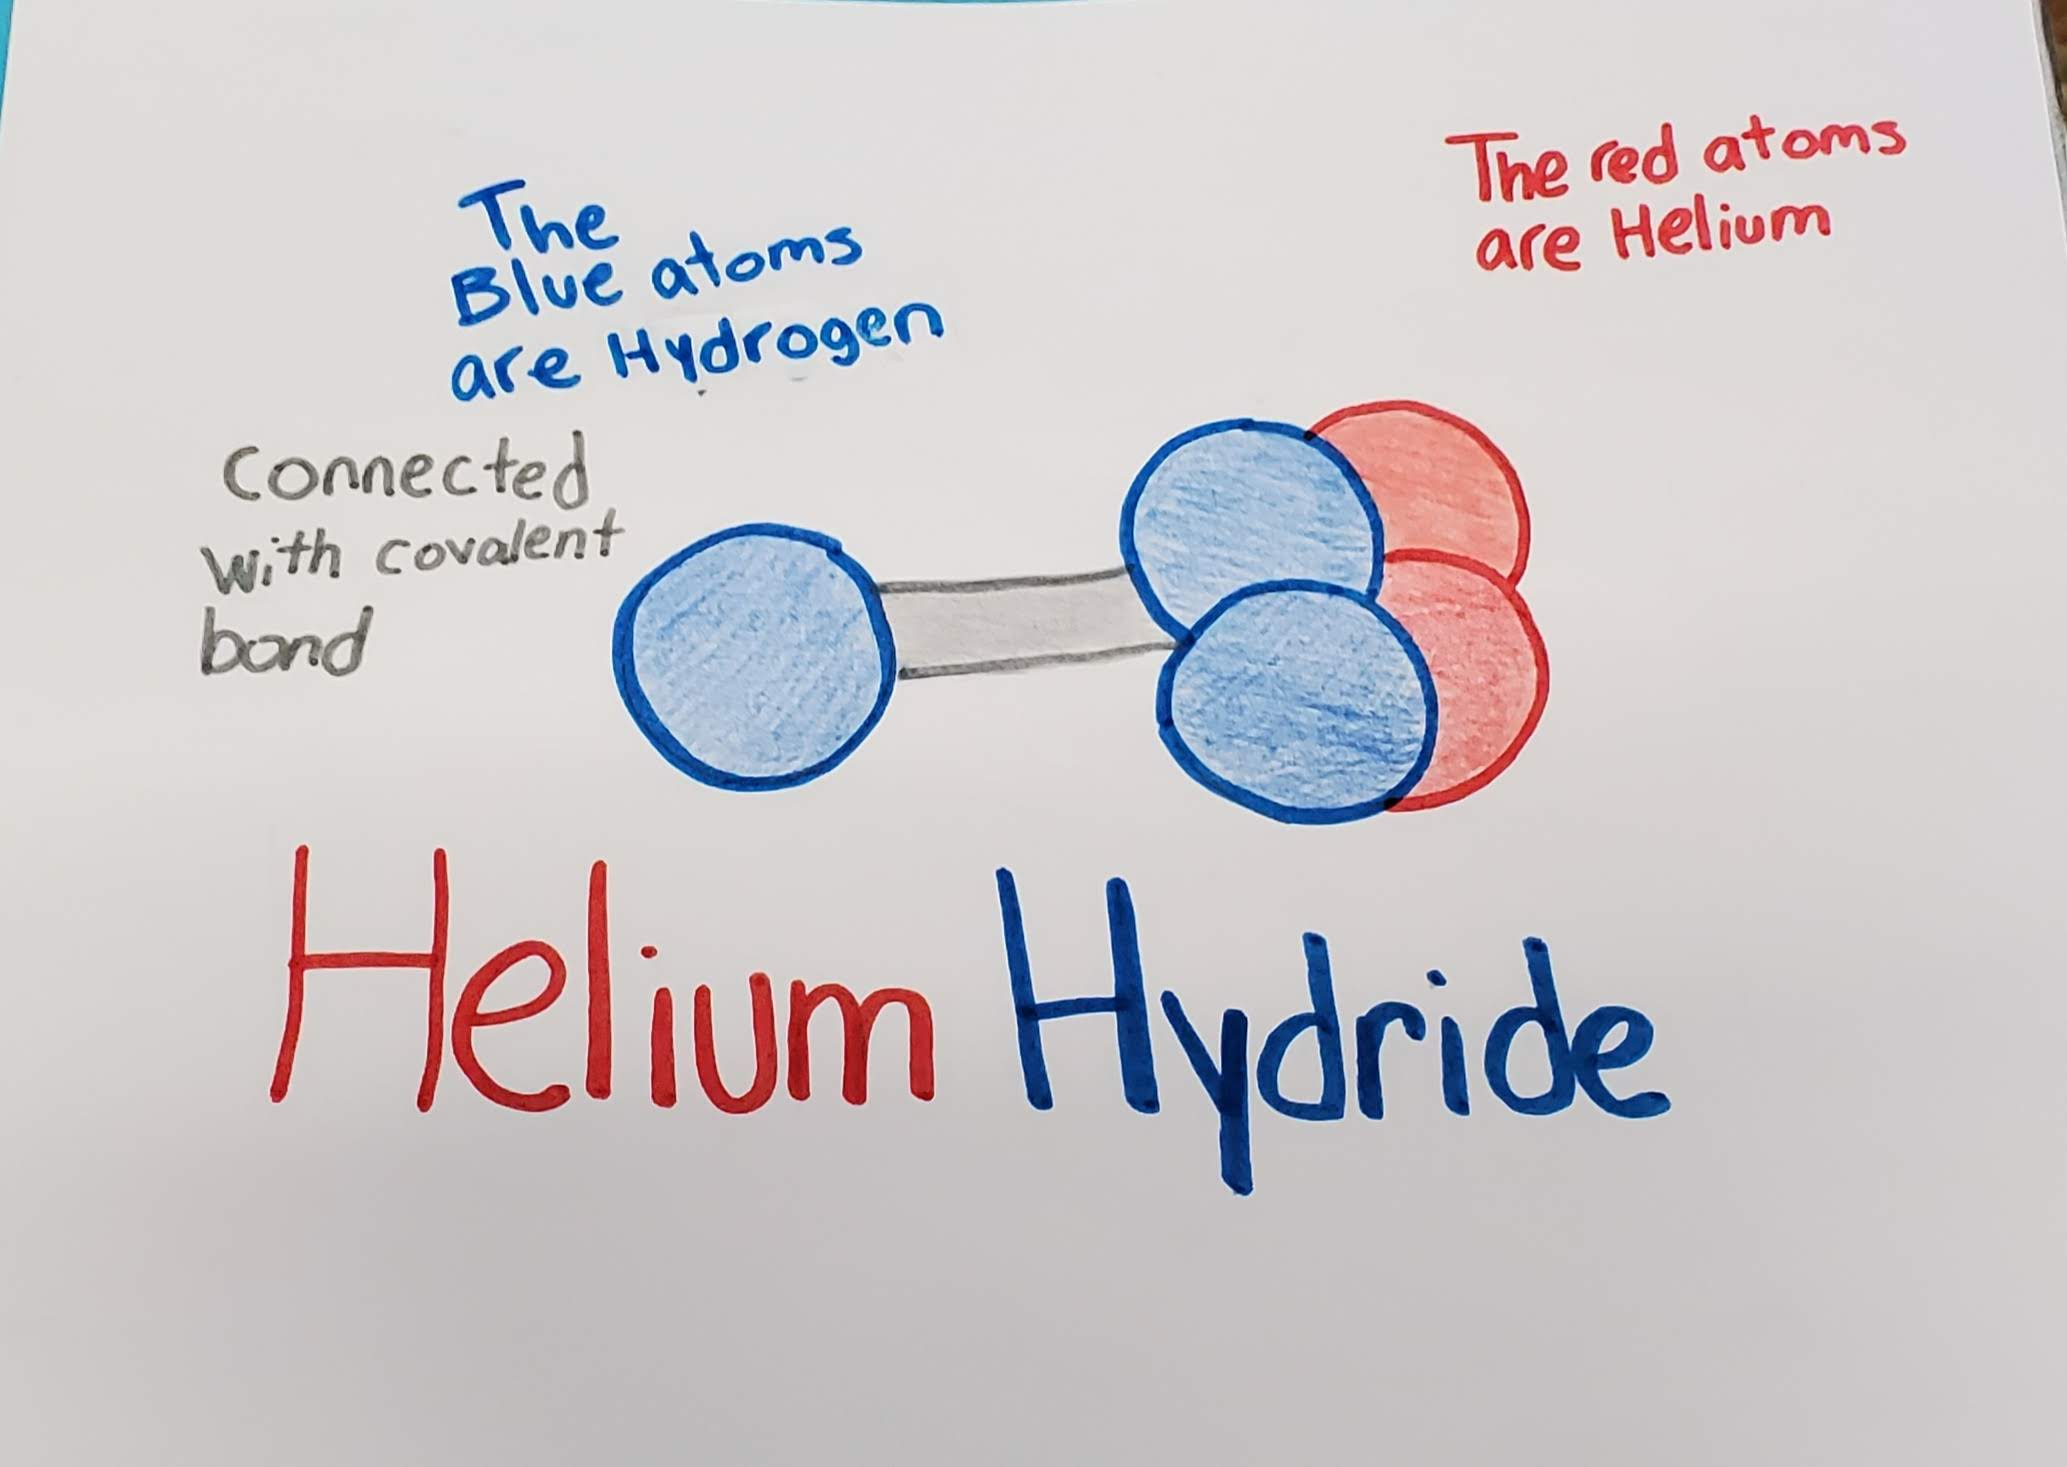

In [ ]:
#@title **Loading the Data for the $HeH^+$ Molecule**
import pennylane as qml
import jax # JAX is a numerical computation library that combines NumPy and autograd
from jax import numpy as np

"""JAX and NumPy are both Python libraries used for numerical computation, but they have key differences.

*   Immutability: JAX arrays are immutable, while NumPy arrays are mutable. This means that once a JAX array is created, it cannot be changed.
*   Autograd: JAX has built-in support for automatic differentiation, while NumPy does not.
*   JIT Compilation: JAX can use just-in-time (JIT) compilation to speed up code execution, while NumPy does not."""

jax.config.update("jax_platform_name", "cpu")
jax.config.update('jax_enable_x64', True)

# Load the data for HeH^+ molecule
dataset = qml.data.load('qchem', molname="HeH+")[0]

# Create the hamiltonian and determine the number of qubits we will need
H, qubits = dataset.hamiltonian, len(dataset.hamiltonian.wires)

print("Number of qubits:", qubits)
print("The Hamiltonian is given by:", H)

Number of qubits: 4
The Hamiltonian is given by: -1.5458724243288817 * I(0) + 0.7582840346680491 * Z(0) + 0.7582840346680491 * Z(1) + 0.23577187542980704 * (Z(0) @ Z(1)) + 0.05258434874916604 * (Y(0) @ Z(1) @ Y(2)) + 0.04324479694907271 * (Y(0) @ Y(2)) + 0.05258434874916604 * (X(0) @ Z(1) @ X(2)) + 0.04324479694907271 * (X(0) @ X(2)) + 0.05258434874916603 * (Y(1) @ Z(2) @ Y(3)) + 0.04324479694907271 * (Z(0) @ Y(1) @ Z(2) @ Y(3)) + 0.05258434874916603 * (X(1) @ Z(2) @ X(3)) + 0.04324479694907271 * (Z(0) @ X(1) @ Z(2) @ X(3)) + 0.03633593176600333 * (Y(0) @ X(1) @ X(2) @ Y(3)) + -0.03633593176600333 * (Y(0) @ Y(1) @ X(2) @ X(3)) + -0.03633593176600333 * (X(0) @ X(1) @ Y(2) @ Y(3)) + 0.03633593176600333 * (X(0) @ Y(1) @ Y(2) @ X(3)) + 0.191995644071161 * Z(2) + 0.1286780507371525 * (Z(0) @ Z(2)) + 0.191995644071161 * Z(3) + 0.16501398250315585 * (Z(0) @ Z(3)) + -0.009339551914671998 * (Y(0) @ Z(1) @ Y(2) @ Z(3)) + -0.009339551914671998 * (X(0) @ Z(1) @ X(2) @ Z(3)) + 0.16501398250315585 *

In [ ]:
#@title **Tabulating the Hamiltonian's Coefficients and Operators**
from tabulate import tabulate

print()
from tabulate import tabulate

# Prepare the data for the table
data = []

# Iterate over coefficients and operators
for coeff, op in zip(H.coeffs, H.ops):
    data.append([str(op), coeff])

# Define the table headers
headers = ["Operator", "Coefficient"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))


╒═══════════════════════════╤═══════════════╕
│ Operator                  │   Coefficient │
╞═══════════════════════════╪═══════════════╡
│ I(0)                      │   -1.54587    │
├───────────────────────────┼───────────────┤
│ Z(0)                      │    0.758284   │
├───────────────────────────┼───────────────┤
│ Z(1)                      │    0.758284   │
├───────────────────────────┼───────────────┤
│ Z(0) @ Z(1)               │    0.235772   │
├───────────────────────────┼───────────────┤
│ Y(0) @ Z(1) @ Y(2)        │    0.0525843  │
├───────────────────────────┼───────────────┤
│ Y(0) @ Y(2)               │    0.0432448  │
├───────────────────────────┼───────────────┤
│ X(0) @ Z(1) @ X(2)        │    0.0525843  │
├───────────────────────────┼───────────────┤
│ X(0) @ X(2)               │    0.0432448  │
├───────────────────────────┼───────────────┤
│ Y(1) @ Z(2) @ Y(3)        │    0.0525843  │
├───────────────────────────┼───────────────┤
│ Z(0) @ Y(1) @ Z(2) @ Y(3) │    

The outputs of the function are the Hamiltonian, represented as a linear combination of Pauli operators, and the number of qubits required for the quantum simulations. The reason why we have to express the hamiltonian as a linear combination of Pauli matrices is because Pauli matrices directly correspond to physical operations on qubits, for example, $σ_x$ corresponds to the flip gate **CNOT** Minimal basis set was used to represent the molecular orbitals. In this approximation, we have four spin orbitals, which defines the number of qubits. Furthermore, we use the Jordan-Wigner transformation to perform the fermionic-to-qubit mapping of the Hamiltonian.

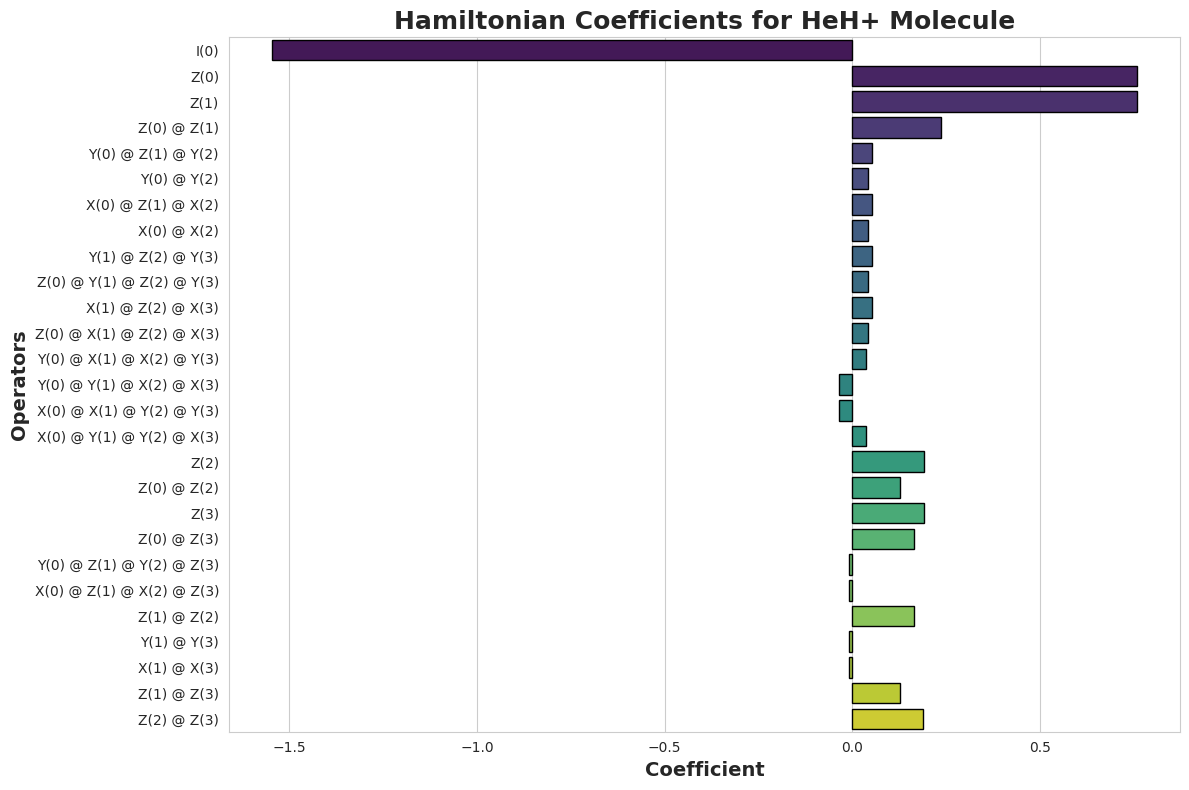

In [ ]:
#@title **Displaying the Hamiltonian Coefficients & Operators for $HeH^+$ Molecule**
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hamiltonian(H, title="Hamiltonian Coefficients for HeH+ Molecule", x_label="Coefficient", y_label="Operators", size=(12, 8)):
    # Set a seaborn style for a polished look
    sns.set_style("whitegrid")

    # Extract coefficients and operators from the Hamiltonian
    coefficients = H.coeffs
    operators = H.ops

    # Convert operators to string labels for readability in the plot
    operator_labels = [str(op) for op in operators]

    # Adjust figure size
    plt.figure(figsize=size)

    # Create the bar plot with hue and no legend to use the palette correctly
    sns.barplot(x=coefficients, y=operator_labels, hue=operator_labels, dodge=False, palette="viridis", edgecolor="black", legend=False)

    # Set labels and title with customized font sizes
    plt.xlabel(x_label, fontsize=14, fontweight="bold")
    plt.ylabel(y_label, fontsize=14, fontweight="bold")
    plt.title(title, fontsize=18, fontweight="bold")

    # Improve the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_hamiltonian(H)

## **7.2 Implementing the VQE Algorithm**

For the following, we can use PennyLane as usual by employing its entire stack of algorithms and optimisers.

In [ ]:
#@title **Defining the device, in this case PennyLane's Standard Qubit Simulator**

# Define the Device
dev = qml.device("lightning.qubit", wires=qubits)

# Device information and capabilities
device_info = {
    "Device name": dev.name,
    "Purpose": "High-Performance Simulator for Quantum Circuits using PennyLane's Lightning Backend",
    "Number of qubits (wires)": qubits,
    "Device Configuration (device path)": dev.config,
    "Device Parameters (if available)": dev.shots,
}

# Print the device information
print("Device Information:\n")
for key, value in device_info.items():
    print(f"{key}: {value}")

# Print supported operations with bullet points
print("\nSupported Device Operations:\n")
operations = sorted(list(dev.operations))

# Reshape the list into sublists with 10 operations per row
reshaped_operations = [operations[i:i + 10] for i in range(0, len(operations), 10)]

# Print the table with 10 operations per row
print(tabulate(reshaped_operations, tablefmt="fancy_grid"))

Device Information:

Device name: lightning.qubit
Purpose: High-Performance Simulator for Quantum Circuits using PennyLane's Lightning Backend
Number of qubits (wires): 4
Device Configuration (device path): /usr/local/lib/python3.10/dist-packages/pennylane_lightning/lightning_qubit/lightning_qubit.toml
Device Parameters (if available): Shots(total=None)

Supported Device Operations:

╒═════════════════════════╤══════════════════════╤══════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤═════════════════════╤══════════════════════════╤══════════════════════════╕
│ Adjoint(ISWAP)          │ Adjoint(S)           │ Adjoint(SISWAP)  │ Adjoint(SX)           │ Adjoint(T)           │ BlockEncode           │ C(BlockEncode)       │ C(DoubleExcitation) │ C(DoubleExcitationMinus) │ C(DoubleExcitationPlus)  │
├─────────────────────────┼──────────────────────┼──────────────────┼───────────────────────┼──────────────────────┼─────────────────

Next, we need to define the quantum circuit that prepares the trial state/**Anasatz** of the ion. We want to prepare states of the form:

- $|\psi_T(\theta)\rangle=\sin(\frac{\theta}{2})|1100\rangle-\cos(\frac{\theta}{2})|0011\rangle$

where $\theta$ is the variational parameter to be optimized in order to find the best approximation to the true ground state.

In the Jordan-Wigner encoding;

-  The first term $|1100\rangle$ represents the Hartree-Fock (HF) state where the two electrons in the molecule occupy the lowest-energy orbitals.
-  The second term $|0011⟩$ encodes a double excitation of the HF state where the two particles are excited from qubits 0, 1 to 2, 3.

The quantum circuit to prepare the trial state $|\psi_T(θ)⟩$ is schematically illustrated as a Givens gate in Fig. 2 below.



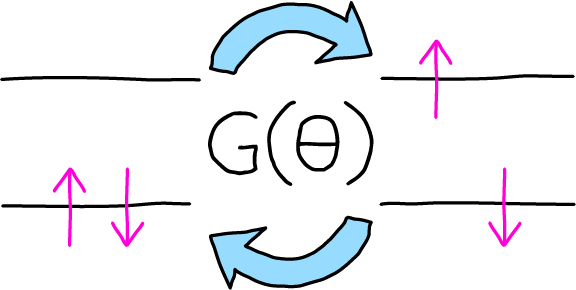


**Figure 2:** Givens Rotational gate.

In this figure, the gate $G^{(2)}(\theta)$ corresponds to the DoubleExcitation operation, implemented in PennyLane as a Givens rotation, which couples the four-qubit states |1100⟩ and |0011⟩. Note that the Givens rotation gates can be decomposed into standard quantum gates, for example the CZ gates combined with $R_y(\theta)$, a standard ansatz for most VQE problems as shown in Fig. 3 below.


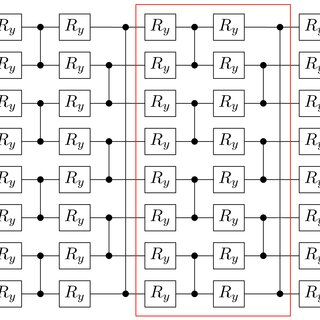


__Figure 3:__ Decomposing a Givens gate into the $R_y(\theta)$ and CNOT gates.


Implementing the above circuit. We generate the vector representing the Hartree-Fock State.

In [ ]:
#@title **Implementing Given's Rotation and Vector Representation of the Hartree-Fock State**
# Define number of electrons and the qubits for the Hartree-Fock state
electrons = 2
hf = qml.qchem.hf_state(electrons, qubits)

# Display the Hartree-Fock state
print("Hartree-Fock (HF) State:")
print(f"Number of electrons: {electrons}")
print(f"Number of qubits: {qubits}")
print(f"HF State Vector: {hf}")

Hartree-Fock (HF) State:
Number of electrons: 2
Number of qubits: 4
HF State Vector: [1 1 0 0]


The __HF__ array is used by the __BasisState()__ operation from pennylane to initialize the qubit register. Then, we just act with the __DoubleExcitation()__ operation on the four qubits. The next step is to compute the expectation value of the molecular Hamiltonian in the trial state prepared by the circuit. We do this using the __expval()__ function. The decorator syntax allows us to run the cost function as an executable __QNode__ with the gate parameter $θ$.

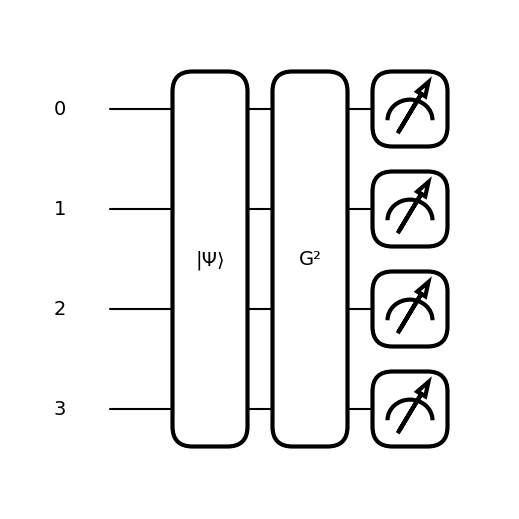

In [ ]:
#@title **Quantum Circuit Definition for Molecular Hamiltonian Expectation Calculation**
#@markdown - **DoubleExcitation(param, wires=[0, 1, 2, 3])**: This gate applies a two-particle excitation (or double excitation) to the qubits, where param is a parameter controlling the strength or magnitude of the excitation.
#@markdown - When **param = 0**, the DoubleExcitation gate will not alter the qubits at all, leaving them in their initial state.
#@markdown - When **param = 1**, it applies the full transformation, which might represent a certain angle of rotation or a specific quantum operation.

@qml.qnode(dev, interface="jax")
def circuit(param, wires):

    # initializes the 4-qubit register
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(param, wires=[0, 1, 2, 3])

    #return the expectation value of our molecular Hamiltonian prepared by the ciruit
    return qml.expval(H)

fig, ax = qml.draw_mpl(circuit)(param=0.5, wires=[0, 1, 2, 3])

In [ ]:
#@title **Energy Expectation Calculation for Given Quantum State**
# Initialise a quantum state and calculate the expectation value of the Hamiltonian H for that state
@qml.qnode(dev)
def exp_energy(state):
  qml.BasisState(np.array(state), wires=range(num_wires))
  return qml.expval(H)

num_wires = qubits
exp_energy(hf)
print("Qubits:", num_wires)
print("Energy Expectation:", exp_energy(hf))

Qubits: 4
Energy Expectation: -2.8419359554488315


In [ ]:
#@title **Ansatz Circuit for Candidate Ground State Preparation**
# build the circuit that prepares the candidate ground state
# params are the parameters of the DEG
def ansatz(params):
  # modify the hf-state, which acts on all the wires
  qml.BasisState(hf, wires=range(num_wires))

  # act with the 1st DEG, 1st element in the list params and acts on wires 0,1,2,3
  # --> since it takes the electons from the lowest energy level to the intermediate energy level
  qml.DoubleExcitation(params[0], wires=[0,1,2,3])

# defines a quantum circuit to prepare a candidate ground state by modifying the Hartree-Fock state and applying the Double Excitation Gate (DEG) parameterized by params

In [ ]:
#@title **Cost Function for Ground State Energy Optimization**
@qml.qnode(dev)
def cost_function(params): # cost function
  ansatz(params) # prepare candidate ground state
  return qml.expval(H) # return the expectation value of the hamiltonian

# compute the expectation value of the Hamiltonian H for a candidate ground state prepared by the ansatz, with the goal of optimizing the energy
print("Expectation Value of the Hamiltonian H:", cost_function([0.1]))

Expectation Value of the Hamiltonian H: -2.8507879499010267


## **7.3 Optimization of the Expectation Value of Hamiltonian**

Step = 0, Energy = -2.84846762 Ha
Step = 2, Energy = -2.85098329 Ha
Step = 4, Energy = -2.85120290 Ha
Step = 6, Energy = -2.85122204 Ha
Step = 8, Energy = -2.85122370 Ha
Step = 10, Energy = -2.85122385 Ha
Step = 12, Energy = -2.85122386 Ha
Step = 14, Energy = -2.85122386 Ha
Step = 16, Energy = -2.85122386 Ha
Step = 18, Energy = -2.85122386 Ha
Step = 20, Energy = -2.85122386 Ha
Step = 22, Energy = -2.85122386 Ha
Step = 24, Energy = -2.85122386 Ha
Step = 26, Energy = -2.85122386 Ha
Step = 28, Energy = -2.85122386 Ha
Step = 30, Energy = -2.85122386 Ha
Step = 32, Energy = -2.85122386 Ha
Step = 34, Energy = -2.85122386 Ha
Step = 36, Energy = -2.85122386 Ha
Step = 38, Energy = -2.85122386 Ha
Final Ground Energy: -2.85122386 Ha
Final Angle Parameters: 0.12763254


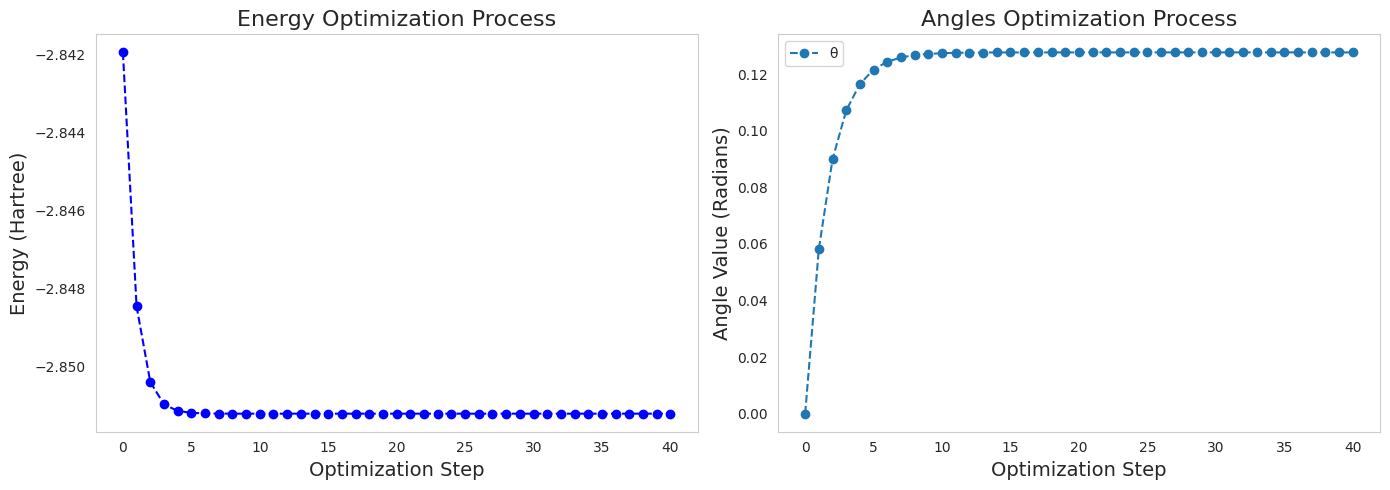

Final energy: -2.85122386 Ha
Optimized angles: [0.12763254]


In [ ]:
#@title **Gradient Descent Optimization for Ground State Energy**
# uses gradient descent to optimize the energy of a quantum system's candidate ground state and visualizes the convergence of energy and parameter values over optimization steps

import matplotlib.pyplot as plt

# Inital Parameters
opt = qml.GradientDescentOptimizer(stepsize=0.4) # gradient descent optimizer
theta = qml.numpy.array([0.0], requires_grad=True) # initial angle
energy = [cost_function(theta)] # energy array
angle = [theta]
max_iterations = 40

for n in range(max_iterations):
  # update step size every 5 iterations (this case --> halves it)
  """if n > 0 and n % 5 == 0:
    opt = qml.GradientDescentOptimizer(stepsize=opt.stepsize * 0.5)"""

  theta, prev_energy = opt.step_and_cost(cost_function, theta)
  energy.append(cost_function(theta))
  angle.append(theta)

  if (n % 2 == 0):
    print(f"Step = {n}, Energy = {energy[-1]:.8f} Ha")


print(f"Final Ground Energy: {energy[-1]:.8f} Ha")
print( f"Final Angle Parameters: {theta[0]:.8f}")

angle = np.array(angle)

# Plot energy values vs optimization steps
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)  # First subplot for energy
plt.plot(range(max_iterations + 1), energy, marker='o', linestyle='--', color='b')
plt.title('Energy Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Energy (Hartree)', fontsize=14)
plt.grid()

# Plot angles vs optimization steps
plt.subplot(1, 2, 2)  # Second subplot for angles
for i in range(angle.shape[1]):  # Plot each parameter in a separate line
    plt.plot(range(max_iterations + 1), angle[:, i], marker='o', linestyle='--', label=f'θ')


plt.title('Angles Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Angle Value (Radians)', fontsize=14)
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

print(f"Final energy: {energy[-1]:.8f} Ha")
print(f"Optimized angles: {theta}")

Step = 0, Energy = -2.84333274 Ha
Step = 1, Energy = -2.84461275 Ha
Step = 2, Energy = -2.84577433 Ha
Step = 3, Energy = -2.84681647 Ha
Step = 4, Energy = -2.84773902 Ha
Step = 5, Energy = -2.84854274 Ha
Step = 6, Energy = -2.84922955 Ha
Step = 7, Energy = -2.84980264 Ha
Step = 8, Energy = -2.85026663 Ha
Step = 9, Energy = -2.85062768 Ha
Step = 10, Energy = -2.85089359 Ha
Step = 11, Energy = -2.85107374 Ha
Step = 12, Energy = -2.85117900 Ha
Step = 13, Energy = -2.85122145 Ha
Step = 14, Energy = -2.85121400 Ha
Step = 15, Energy = -2.85116986 Ha
Step = 16, Energy = -2.85110200 Ha
Step = 17, Energy = -2.85102243 Ha
Step = 18, Energy = -2.85094171 Ha
Step = 19, Energy = -2.85086849 Ha


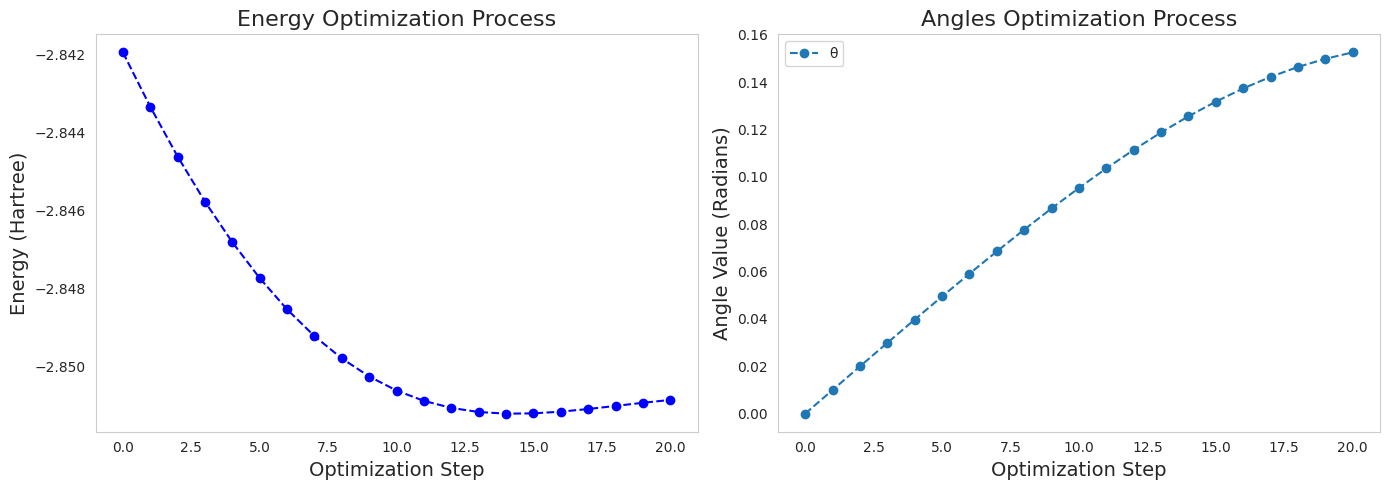

Final energy: -2.85086849 Ha
Optimized angles: [0.15258178]


In [ ]:
#@title **Adam Optimization for Ground State Energy**

import matplotlib.pyplot as plt

opt = qml.AdamOptimizer(stepsize=0.01)
theta = qml.numpy.array([0.0], requires_grad=True) # initial

energy = [cost_function(theta)] # energy array
angle = [theta]
max_iterations = 20

for n in range(max_iterations):
  theta, prev_energy = opt.step_and_cost(cost_function, theta)
  energy.append(cost_function(theta))
  angle.append(theta)

  print(f"Step = {n}, Energy = {energy[-1]:.8f} Ha")

angle = np.array(angle)

# Plot energy values vs optimization steps
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)  # First subplot for energy
plt.plot(range(max_iterations + 1), energy, marker='o', linestyle='--', color='b')
plt.title('Energy Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Energy (Hartree)', fontsize=14)
plt.grid()

# Plot angles vs optimization steps
plt.subplot(1, 2, 2)  # Second subplot for angles
for i in range(angle.shape[1]):  # Plot each parameter in a separate line
    plt.plot(range(max_iterations + 1), angle[:, i], marker='o', linestyle='--', label=f'θ')


plt.title('Angles Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Angle Value (Radians)', fontsize=14)
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

print(f"Final energy: {energy[-1]:.8f} Ha")
print(f"Optimized angles: {theta}")

Step = 0, Energy = -2.85122386 Ha
Step = 2, Energy = -2.85122386 Ha
Step = 4, Energy = -2.85122386 Ha
Step = 6, Energy = -2.85122386 Ha
Step = 8, Energy = -2.85122386 Ha
Step = 10, Energy = -2.85122386 Ha
Step = 12, Energy = -2.85122386 Ha
Step = 14, Energy = -2.85122386 Ha
Step = 16, Energy = -2.85122386 Ha
Step = 18, Energy = -2.85122386 Ha
Final Ground Energy: -2.85122386 Ha
Final Angle Parameters: 0.12762500


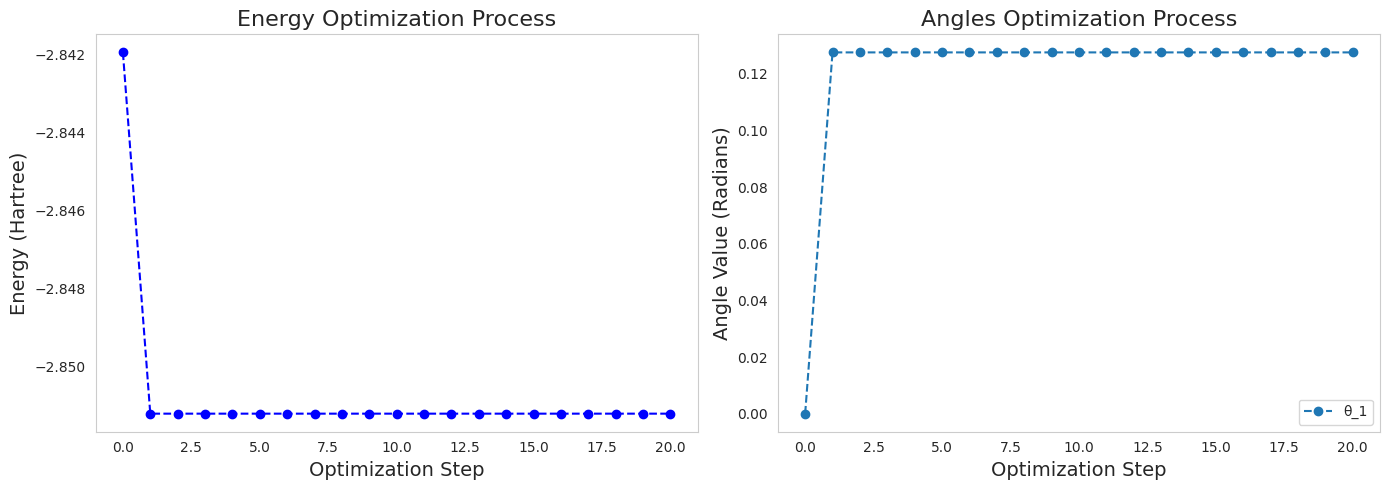

In [ ]:
#@title **Nelder-Mead Optimization for Ground State Energy**

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Initialize parameters
theta = np.array([0.0])  # Initial angle with consistent shape
energy = [cost_function(theta)]  # Ensure initial energy is scalar
angle = [theta.copy()]  # Track theta values
max_iterations = 20

# Define a cost function wrapper for compatibility with `minimize`
def cost_wrapper(params):
    return cost_function(params)  # Ensure the cost function output is scalar

# Run the optimizer using Nelder-Mead
result = minimize(cost_wrapper, theta, method='Nelder-Mead', options={'maxiter': max_iterations})

# Extract optimized values
optimized_theta = result.x
optimized_energy = result.fun

# Track optimization process
for n in range(max_iterations):
    theta = result.x.copy()  # Update theta with optimized values from each step
    energy.append(cost_function(theta))  # Ensure energy is scalar
    angle.append(theta.copy())  # Append a consistent 1D copy of theta
    if n % 2 == 0:
        print(f"Step = {n}, Energy = {energy[-1]:.8f} Ha")

print(f"Final Ground Energy: {energy[-1]:.8f} Ha")
print(f"Final Angle Parameters: {optimized_theta[0]:.8f}")

# Convert `angle` to a NumPy array
angle = np.array(angle)

# Plot energy values vs optimization steps
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)  # First subplot for energy
plt.plot(range(max_iterations + 1), energy, marker='o', linestyle='--', color='b')
plt.title('Energy Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Energy (Hartree)', fontsize=14)
plt.grid()

# Plot angles vs optimization steps
plt.subplot(1, 2, 2)  # Second subplot for angles
for i in range(angle.shape[1]):  # Plot each parameter in a separate line
    plt.plot(range(max_iterations + 1), angle[:, i], marker='o', linestyle='--', label=f'θ_{i+1}')

plt.title('Angles Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Angle Value (Radians)', fontsize=14)
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()


Step = 0, Energy = -2.84596511 Ha
Step = 2, Energy = -2.84904921 Ha
Step = 4, Energy = -2.85028028 Ha
Step = 6, Energy = -2.85082963 Ha
Step = 8, Energy = -2.85107126 Ha
Step = 10, Energy = -2.85117061 Ha
Step = 12, Energy = -2.85120751 Ha
Step = 14, Energy = -2.85121955 Ha
Step = 16, Energy = -2.85122291 Ha
Step = 18, Energy = -2.85122369 Ha
Step = 20, Energy = -2.85122384 Ha
Step = 22, Energy = -2.85122386 Ha
Step = 24, Energy = -2.85122386 Ha
Step = 26, Energy = -2.85122386 Ha
Step = 28, Energy = -2.85122386 Ha
Step = 30, Energy = -2.85122386 Ha
Step = 32, Energy = -2.85122386 Ha
Step = 34, Energy = -2.85122386 Ha
Step = 36, Energy = -2.85122386 Ha
Step = 38, Energy = -2.85122386 Ha


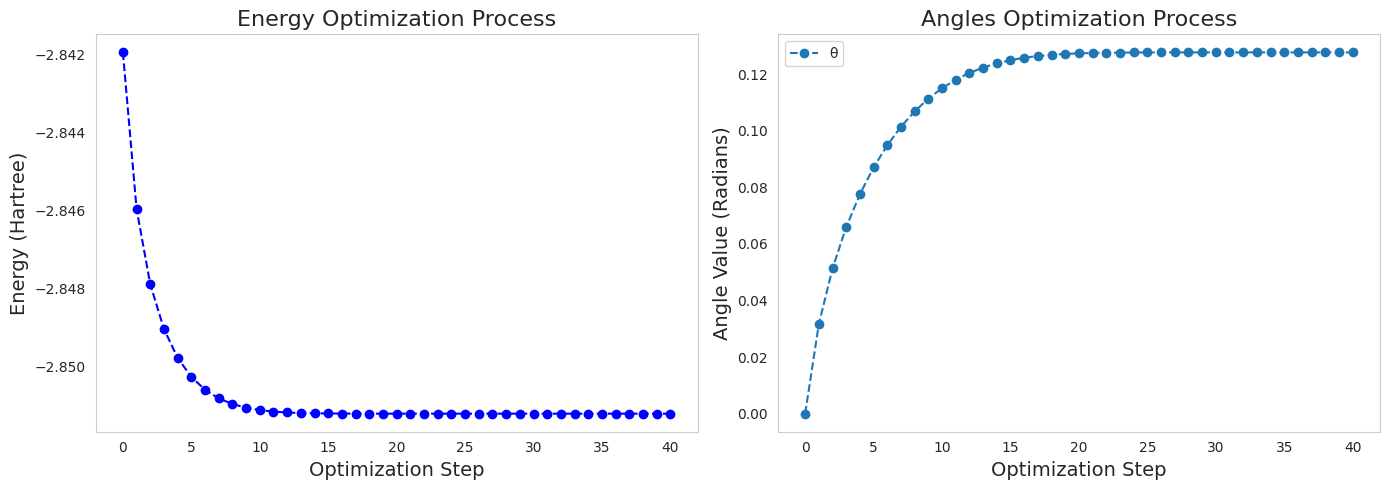

Final energy: -2.85122386 Ha
Optimized angles: [0.12763254]


In [ ]:
#@title **RMSProp Optimization for Ground State Energy**
import matplotlib.pyplot as plt

opt = qml.RMSPropOptimizer(stepsize=0.01)
theta = qml.numpy.array([0.0], requires_grad=True) # initial

energy = [cost_function(theta)] # energy array
angle = [theta]
max_iterations = 40

for n in range(max_iterations):
  theta, prev_energy = opt.step_and_cost(cost_function, theta)
  energy.append(cost_function(theta))
  angle.append(theta)

  if (n % 2 == 0):
    print(f"Step = {n}, Energy = {energy[-1]:.8f} Ha")


angle = np.array(angle)

# Plot energy values vs optimization steps
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)  # First subplot for energy
plt.plot(range(max_iterations + 1), energy, marker='o', linestyle='--', color='b')
plt.title('Energy Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Energy (Hartree)', fontsize=14)
plt.grid()

# Plot angles vs optimization steps
plt.subplot(1, 2, 2)  # Second subplot for angles
for i in range(angle.shape[1]):  # Plot each parameter in a separate line
    plt.plot(range(max_iterations + 1), angle[:, i], marker='o', linestyle='--', label=f'θ')


plt.title('Angles Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Angle Value (Radians)', fontsize=14)
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

print(f"Final energy: {energy[-1]:.8f} Ha")
print(f"Optimized angles: {theta}")

Step = 0, Energy = -2.84193596 Ha
Step = 2, Energy = -2.85040506 Ha
Step = 4, Energy = -2.85115288 Ha
Step = 6, Energy = -2.85121822 Ha
Step = 8, Energy = -2.85122346 Ha
Step = 10, Energy = -2.85122384 Ha
Step = 12, Energy = -2.85122386 Ha
Step = 14, Energy = -2.85122386 Ha
Step = 16, Energy = -2.85122386 Ha
Step = 18, Energy = -2.85122386 Ha
Step = 20, Energy = -2.85122386 Ha
Step = 22, Energy = -2.85122386 Ha
Step = 24, Energy = -2.85122386 Ha
Step = 26, Energy = -2.85122386 Ha
Step = 28, Energy = -2.85122386 Ha
Step = 30, Energy = -2.85122386 Ha
Step = 32, Energy = -2.85122386 Ha
Step = 34, Energy = -2.85122386 Ha


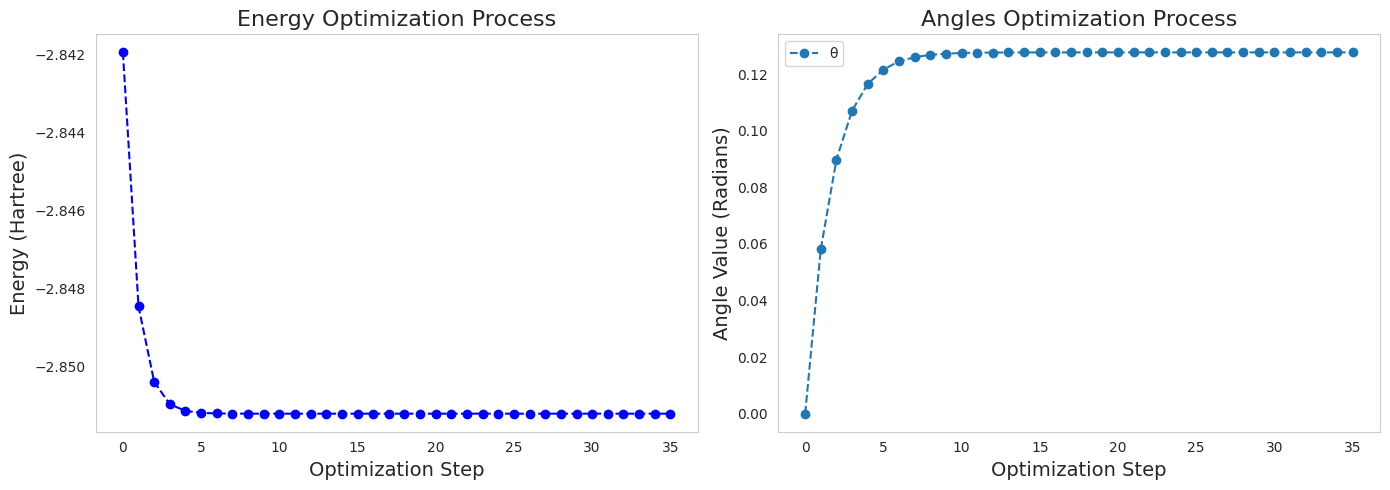

Final energy: -2.85122386 Ha
Optimized angles: [0.12763254]


In [ ]:
#@title **Hybrid Gradient Descent and RMSProp Optimization for Ground State Energy Part I**
import matplotlib.pyplot as plt

# Initial parameters
theta = qml.numpy.array([0.0], requires_grad=True)

# Optimizers: Gradient Descent and RMSProp
gd_opt = qml.GradientDescentOptimizer(stepsize=0.4)
rmsprop_opt = qml.RMSPropOptimizer(stepsize=0.01)

energy = [cost_function(theta)]  # Track energy values
angle = [theta]
max_iterations = 35

# Optimization loop
for n in range(max_iterations):
    if n % 2 == 0:
        # Use Gradient Descent for even steps
        theta, prev_energy = gd_opt.step_and_cost(cost_function, theta)
        print(f"Step = {n}, Energy = {energy[-1]:.8f} Ha")
    else:
        # Use RMSProp for odd steps
        theta, prev_energy = rmsprop_opt.step_and_cost(cost_function, theta)

    #theta, prev_energy = gd_opt.step_and_cost(cost_function, theta)
    energy.append(cost_function(theta))
    angle.append(theta)

angle = np.array(angle)

# Plot the energy optimization process
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)  # First subplot for energy
plt.plot(range(max_iterations + 1), energy, marker='o', linestyle='--', color='b')
plt.title('Energy Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Energy (Hartree)', fontsize=14)
plt.grid()

# Plot angles vs optimization steps
plt.subplot(1, 2, 2)  # Second subplot for angles
for i in range(angle.shape[1]):  # Plot each parameter in a separate line
    plt.plot(range(max_iterations + 1), angle[:, i], marker='o', linestyle='--', label=f'θ')


plt.title('Angles Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Angle Value (Radians)', fontsize=14)
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

# Print the final optimized parameters and energy
print(f"Final energy: {energy[-1]:.8f} Ha")
print(f"Optimized angles: {theta}")

Step = 0, Energy = -2.84596511 Ha
Step = 2, Energy = -2.84904921 Ha
Step = 4, Energy = -2.85028028 Ha
Step = 6, Energy = -2.85082963 Ha
Step = 8, Energy = -2.85107126 Ha
Step = 10, Energy = -2.85117061 Ha
Step = 12, Energy = -2.85120751 Ha
Switching to Gradient Descent at step 13
Step = 14, Energy = -2.85122133 Ha
Step = 16, Energy = -2.85122364 Ha
Step = 18, Energy = -2.85122384 Ha
Step = 20, Energy = -2.85122386 Ha
Step = 22, Energy = -2.85122386 Ha
Step = 24, Energy = -2.85122386 Ha
Step = 26, Energy = -2.85122386 Ha
Step = 28, Energy = -2.85122386 Ha
Step = 30, Energy = -2.85122386 Ha
Step = 32, Energy = -2.85122386 Ha
Step = 34, Energy = -2.85122386 Ha
Step = 36, Energy = -2.85122386 Ha
Step = 38, Energy = -2.85122386 Ha
Step = 40, Energy = -2.85122386 Ha
Step = 42, Energy = -2.85122386 Ha
Step = 44, Energy = -2.85122386 Ha
Step = 46, Energy = -2.85122386 Ha
Step = 48, Energy = -2.85122386 Ha


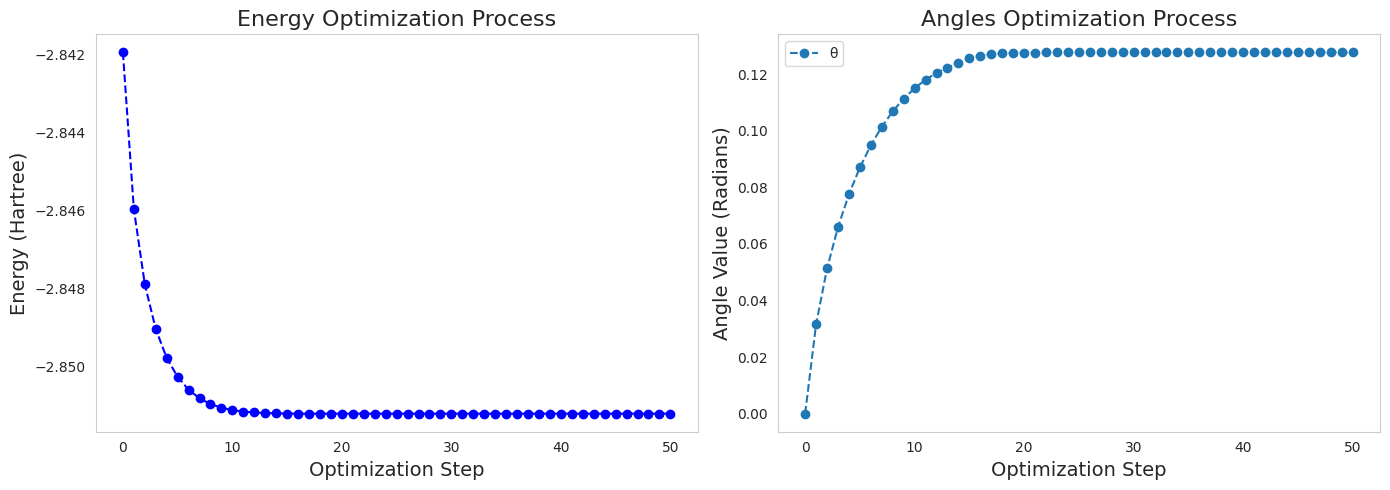

Final energy: -2.85122386 Ha
Optimized angles: [0.12763254]


In [ ]:
#@title **Hybrid Gradient Descent and RMSProp Optimization for Ground State Energy Part II**

import matplotlib.pyplot as plt
import pennylane as qml

# Initial parameters
theta = qml.numpy.array([0.0], requires_grad=True)

# Optimizers: Gradient Descent and RMSProp
gd_opt = qml.GradientDescentOptimizer(stepsize=0.4)
rmsprop_opt = qml.RMSPropOptimizer(stepsize=0.01)

energy = [cost_function(theta)]  # Track energy values
angle = [theta]
max_iterations = 50  # Increased to demonstrate switch-over

# Convergence threshold to switch optimizers --> for hybrid alg. -> [1e-4, 1e-6]
convergence_threshold = 1e-5             # --> for q. chem. -> [,1e-6]
rmsprop_active = True  # Start with RMSProp

# Optimization loop
for n in range(max_iterations):
    if rmsprop_active:
        # Use RMSProp optimizer
        theta, prev_energy = rmsprop_opt.step_and_cost(cost_function, theta)
    else:
        # Use Gradient Descent optimizer
        theta, prev_energy = gd_opt.step_and_cost(cost_function, theta)

    # Compute current energy and store it
    current_energy = cost_function(theta)
    energy.append(current_energy)
    angle.append(theta)

    # Check for convergence: if change in energy is small, switch to GD
    if rmsprop_active and abs(current_energy - prev_energy) < convergence_threshold:
        print(f"Switching to Gradient Descent at step {n}")
        rmsprop_active = False

    if (n % 2 == 0):
      print(f"Step = {n}, Energy = {current_energy:.8f} Ha")

angle = np.array(angle)

# Plot the energy optimization process
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)  # First subplot for energy
plt.plot(range(max_iterations + 1), energy, marker='o', linestyle='--', color='b')
plt.title('Energy Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Energy (Hartree)', fontsize=14)
plt.grid()

# Plot angles vs optimization steps
plt.subplot(1, 2, 2)  # Second subplot for angles
for i in range(angle.shape[1]):  # Plot each parameter in a separate line
    plt.plot(range(max_iterations + 1), angle[:, i], marker='o', linestyle='--', label=f'θ')


plt.title('Angles Optimization Process', fontsize=16)
plt.xlabel('Optimization Step', fontsize=14)
plt.ylabel('Angle Value (Radians)', fontsize=14)
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

# Print the final optimized parameters and energy
print(f"Final energy: {energy[-1]:.8f} Ha")
print(f"Optimized angles: {theta}")


## **7.4 Actual Ground State Energy**

In [ ]:
#@title **Quantum Circuit for Ground State Wavefunction Retrieval**
@qml.qnode(dev)
def get_ground_state(params):
  ansatz(params)
  return qml.state()

get_ground_state(theta)

array([ 0.        +0.j,  0.        +0.j,  0.        +0.j, -0.06377296+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.99796443+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])

In [ ]:
#@title **Visualizing a Quantum Circuit: Basis State Preparation and Double Excitation Part I**
import pennylane as qml

# Create a quantum device
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit(params):
    # quantum circuit that prepares the state
    qml.BasisState([0, 0, 0, 0], wires=range(4))
    qml.DoubleExcitation(params[0], wires=[0, 1, 2, 3])
    return qml.state()

# Use qml.draw to visualize the quantum circuit
print(qml.draw(circuit)([theta]))

0: ─╭|Ψ⟩─╭G²(M0)─┤  State
1: ─├|Ψ⟩─├G²(M0)─┤  State
2: ─├|Ψ⟩─├G²(M0)─┤  State
3: ─╰|Ψ⟩─╰G²(M0)─┤  State

M0 = 
[0.12763254]


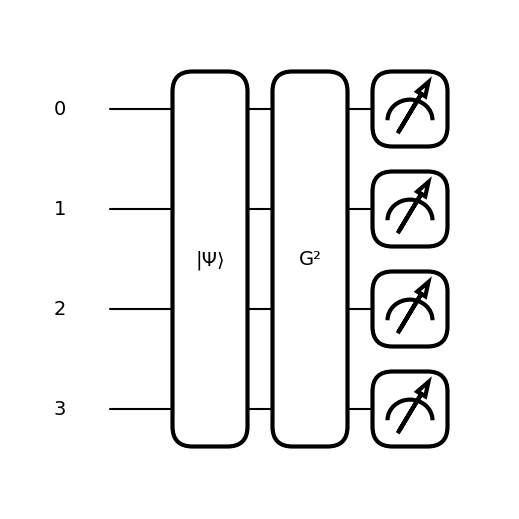

In [ ]:
#@title **Visualizing a Quantum Circuit: Basis State Preparation and Double Excitation Part II**

import pennylane as qml

# Create a quantum device
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit(params):
    # Start with the |0000> state (default state)
    qml.BasisState([0, 0, 0, 0], wires=range(qubits))

    # Apply the DoubleExcitation gate (parameterized by `params[0]`)
    qml.DoubleExcitation(params[0], wires=[0, 1, 2, 3])

    # Return the state
    return qml.state()

# Visualize the quantum circuit
fig, ax = qml.draw_mpl(circuit)(theta)

# Apply a DoubleExcitation gate, which creates a superposition of states like ∣1100⟩∣ and ∣0011⟩

$|Ψ(θ^{*})⟩$ = -0.0635|1100⟩ + 0.9970|0011⟩

# **8. Additional & Aside**

We can now define our **cost/error function** simply as the expected value calculated above:

In [ ]:
#@title **Define our Cost Function as the Expected Value Calculated Above**
def cost_fn(param):
    return circuit(param)

Now we proceed to minimize the cost function to find the ground state of the **He-H$^+$** ion. To start, we need to define the classical optimizer. Here we use a basic *Gradient-Descent Optimizer*. We carry out the optimization over a maximum of 100 steps aiming to reach a convergence tolerance of $10^{-6}$ for the value of the cost function.

We initialize the circuit parameter $θ$ to zero, meaning that we start from the Hartree-Fock state.

In [ ]:
#@title **Minimising the Cost Function to find the Ground State of the $HeH^+$ Ion**
import jax
import optax
import numpy as np
import pennylane as qml

# Define your quantum device
dev = qml.device("default.qubit", wires=4)

# Define your quantum circuit (make sure to return a scalar)
@qml.qnode(dev, interface="jax")
def circuit(params):
    qml.BasisState([0, 0, 0, 0], wires=range(4))
    qml.DoubleExcitation(params[0], wires=[0, 1, 2, 3])
    # Return the expectation value of an observable
    return qml.expval(H)

# Initialize parameters and optimizer
theta = qml.numpy.array([0.0], requires_grad=True) # Initialize theta as a 1D array
max_iterations = 100  # Define max_iterations as per your requirement
conv_tol = 1e-6  # Set convergence tolerance
energy = [cost_fn(theta)]  # Store the values of the cost function
angle = [theta]  # Store the values of the circuit parameter

# Initialize the optimizer
opt = optax.rmsprop(learning_rate=0.4)
opt_state = opt.init(theta)  # Initialize optimizer state

# Gradient descent loop
for n in range(max_iterations):
    gradient = jax.grad(cost_fn)(theta)  # Compute the gradient
    updates, opt_state = opt.update(gradient, opt_state)  # Update the optimizer state
    theta = optax.apply_updates(theta, updates)  # Apply the updates to theta

    # Store the new parameter and energy
    angle.append(theta)
    energy.append(cost_fn(theta))

    # Convergence check
    conv = np.abs(energy[-1] - energy[-2])
    if n % 2 == 0:
        print(f"Step = {n}, Energy = {energy[-1]:.8f} Ha")

    if conv <= conv_tol:
        break

# Final results
print("\nFinal value of the ground-state energy = {:.8f} Ha".format(energy[-1]))
print(f"Optimal value of the circuit parameter = {angle[-1][0]:.4f}")

/usr/local/lib/python3.10/dist-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'jax', 'autograd'}; dispatch will prioritize TensorFlow, PyTorch, and Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


Step = 0, Energy = 1.36596832 Ha

Final value of the ground-state energy = 1.36596832 Ha
Optimal value of the circuit parameter = 0.0000


Let's plot the values of the ground state energy of the molecule and the gate parameter $θ$ as a function of the optimization step.

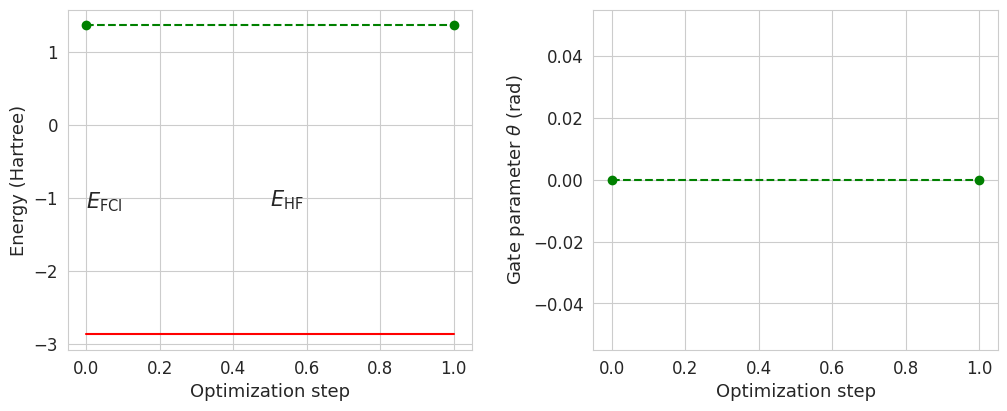

In [ ]:
#@title **Plotting the Values of the Ground State Energy of the Molecule in the Optimization Step**
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)

# Full configuration interaction (FCI) energy computed classically
E_fci= -2.865

# Add energy plot on column 1
ax1 = fig.add_subplot(121)
ax1.plot(range(n + 2), energy, "go", ls="dashed")
ax1.plot(range(n + 2), np.full(n + 2, E_fci), color="red")
ax1.set_xlabel("Optimization step", fontsize=13)
ax1.set_ylabel("Energy (Hartree)", fontsize=13)
ax1.text(0.5, -1.1176, r"$E_\mathrm{HF}$", fontsize=15)
ax1.text(0, -1.1357, r"$E_\mathrm{FCI}$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add angle plot on column 2
ax2 = fig.add_subplot(122)
ax2.plot(range(n + 2), angle, "go", ls="dashed")
ax2.set_xlabel("Optimization step", fontsize=13)
ax2.set_ylabel("Gate parameter $\\theta$ (rad)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(wspace=0.3, bottom=0.2)
plt.show()

In this case, the VQE algorithm converges after thirteen iterations. The optimal value of the circuit parameter  
$θ^{*}$ = 0.1271 defines the state $|Ψ(θ^{*})⟩$ = 0.0635|1100⟩ - 0.9970|0011⟩, which is precisely the ground state of the __He-H$^+$__ molecule in a minimal basis set approximation.

## **Comparing Optimisers**
**Nelder-Mead Optimizer**

Using a different optimiser that was used by Alberto Peruzzo on his paper, the Nelder-Mead optimiser-- we were able to get a slightly better approximation of -2.851563 Hartree.

On the paper he explain that they verified that the gradient descent minimisation algorithm is not able to converge to the ground state of their Hamiltonian due to the poissonian nature of their photonic source.

Below is a plot of the results of the Nelder-Mead optimiser.

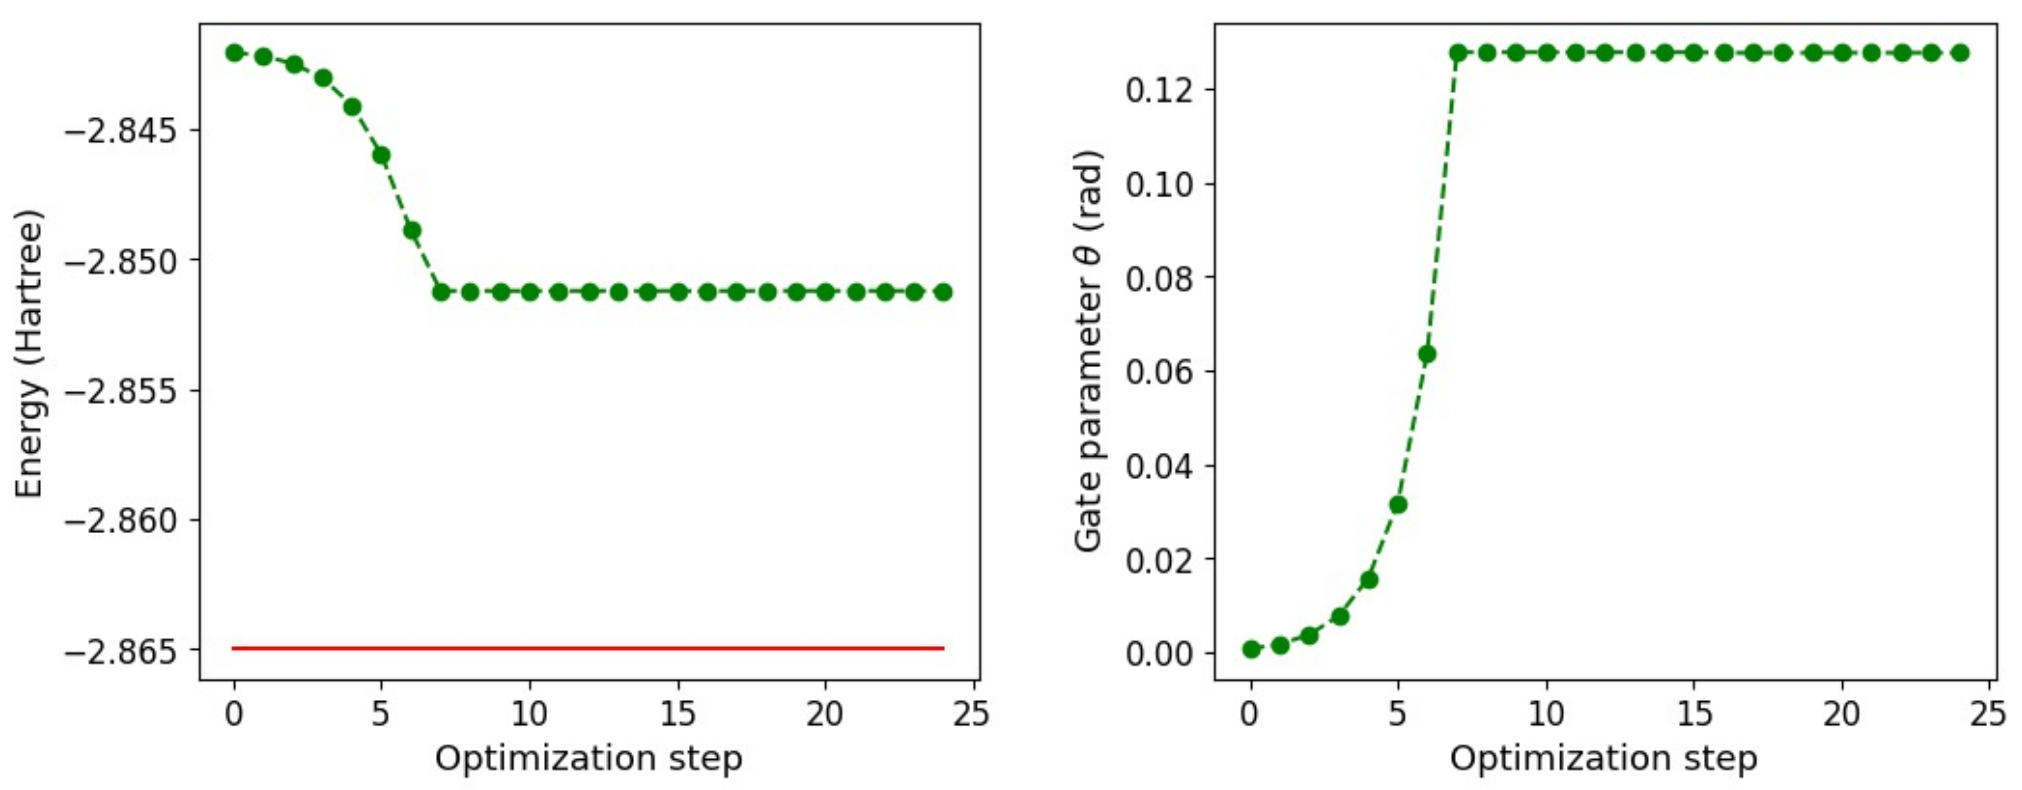

# **9. Discussion**

In this implementation of the Variational Quantum Eigensolver (VQE) for the Helium-Hydride $HeH^{+}$ molecule, we demonstrate the ability of quantum algorithms to approximate ground-state energies of molecular systems, bridging quantum computing with quantum chemistry. The VQE process is centered around optimizing the variational parameters of a candidate quantum state so that its energy expectation closely approaches the actual ground-state energy of the molecule's Hamiltonian. Here, we utilize the high-performance capabilities of the PennyLane "lightning.qubit" simulator to facilitate accurate and efficient simulations of quantum circuits, making it possible to explore the full range of VQE optimizers and understand their influence on convergence behavior and result precision.

The circuit designed for the trial state involves initializing the Hartree-Fock (HF) state and applying a double excitation. This encoding leverages the Jordan-Wigner transformation, with states such as:

* ∣1100⟩ representing the HF configuration
* ∣0011⟩ representing a double excitation


These are relevant to accurately approximating the electronic structure of the $HeH^{+}$ molecule. By iteratively adjusting the variational parameters using classical optimization routines, we iteratively approach the system’s ground state.


Notably, we employ several optimizers:

1.   Gradient Descent
2.   Adam
3.   RMSProp
4.   Nelder-Mead
5.   A hybrid method combining Gradient Descent and RMSProp

Each optimizer demonstrates distinct convergence rates, sensitivities to initial conditions, and final energy values, highlighting the importance of optimizer selection based on system-specific characteristics.

Throughout the optimization, the energy convergence curves and parameter evolution plots show that a slower but stable convergence is achievable with optimizers such as RMSProp and Adam, while Gradient Descent converges faster but with potential instabilities if step sizes are not carefully managed. Notably, the Nelder-Mead optimizer, despite being gradient-free, successfully minimized the energy expectation but took longer to converge compared to gradient-based methods.

# **10. Conclusion**

This VQE implementation exemplifies the potential of variational quantum algorithms in solving quantum chemistry problems, particularly for small molecules like $HeH^{+}$. By comparing various optimizers, we observe that optimization stability and convergence are impacted by both the choice of optimizer and step-size configuration. The gradient-based optimizers (such as Adam and RMSProp) offered a balance between speed and stability, proving effective in refining the ground state energy estimation.

Overall, VQE provides a practical approach for solving molecular Hamiltonians on near-term quantum hardware, bringing us closer to efficiently simulating molecular structures that could be challenging with classical computation alone. However, limitations such as hardware noise, finite gate fidelity, and decoherence are key challenges that must be addressed for practical applications on actual quantum hardware.

Future research could explore hybrid quantum-classical optimization strategies and more efficient ansatz configurations to enhance the scalability of VQE for larger molecules, which could expand its applicability in quantum chemistry and materials science.

# **11. Appendix**

## **11.1 Jordan-Wigner Transformation**

The Jordan-Wigner transformation is a mathematical mapping used in quantum physics and quantum information theory to translate between fermionic systems (which follow Fermi-Dirac statistics) and spin systems (which can be represented by qubits or Pauli matrices). It was introduced by Pascual Jordan and Eugene Wigner in 1928.

__Purpose of the Jordan-Wigner Transformation:__
The Jordan-Wigner transformation is a mathematical mapping used in quantum physics and quantum information theory to translate between fermionic systems (which follow Fermi-Dirac statistics) and spin systems (which can be represented by qubits or Pauli matrices). It was introduced by Pascual Jordan and Eugene Wigner in 1928.

**Purpose of the Jordan-Wigner Transformation:**
Fermionic systems are inherently difficult to simulate on classical computers because fermions obey the Pauli exclusion principle and their creation/annihilation operators obey anticommutation relations. The Jordan-Wigner transformation helps convert these fermionic operators into spin operators, which are easier to manipulate, especially in the context of quantum simulations.

Key Idea:
The basic idea is to map fermionic creation and annihilation operators to spin operators, which obey Pauli matrix algebra. Specifically:

- For a fermion on site $j$, $c_j$ can be written as:

$$c_j=(\prod_{k=1}^{k-1}σ_z^k)σ_j^-$$

where $σ_j^-=\frac{1}{2}(\sigma_x^j-i\sigma_y^j)$ is the spin lowering operator for site $j$.

- The creation operator $c_j^†$ is:

$$c_j^†=(\prod_{k=1}^{k-1}σ_z^k)σ_j^+$$

where $σ_j^+=\frac{1}{2}(\sigma_x^j+i\sigma_y^j)$ is the spin raising operator.

Though very effective for 1D systems, the Jordan-Wigner transformation becomes more complex for higher-dimensional systems, leading to other techniques such as the Bravyi-Kitaev transformation.

## **11.2 Hartree-Fock States**
In computational physics and chemistry, the Hartree–Fock (HF) method is a method of approximation for the determination of the wave function and the energy of a quantum many-body system in a stationary state.

The Hartree–Fock method often assumes that the exact N-body wave function of the system can be approximated by a single Slater determinant (in the case where the particles are fermions) or by a single permanent (in the case of bosons) of N spin-orbitals. By invoking the variational method, one can derive a set of N-coupled equations for the N spin orbitals. A solution of these equations yields the Hartree–Fock wave function and energy of the system. The Hartree–Fock method finds its typical application in the solution of the Schrödinger equation for atoms, molecules, nanostructures and solids but it has also found widespread use in nuclear physics.

In atomic structure theory, calculations may be for a spectrum with many excited energy levels, and consequently, the Hartree–Fock method for atoms assumes the wave function is a single configuration state function with well-defined quantum numbers and that the energy level is not necessarily the ground state.

For both atoms and molecules, the Hartree–Fock solution is the central starting point for most methods that describe the many-electron system more accurately. The Hartree–Fock method is typically used to solve the time-independent Schrödinger equation for a multi-electron atom or molecule as described in the Born–Oppenheimer approximation. Since there are no known analytic solutions for many-electron systems (there are solutions for one-electron systems such as hydrogenic atoms and the diatomic hydrogen cation), the problem is solved numerically.


__Variational Optimization of Orbitals__
---
The variational theorem states that for a time-independent Hamiltonian operator, any trial wave function will have an energy expectation value that is greater than or equal to the true ground-state wave function corresponding to the given Hamiltonian. Because of this, the Hartree–Fock energy is an upper bound to the true ground-state energy of a given molecule. In the context of the Hartree–Fock method, the best possible solution is at the Hartree–Fock limit. The Hartree–Fock energy is the minimal energy for a single Slater determinant.
The starting point for the Hartree–Fock method is a set of approximate one-electron wave functions known as spin-orbitals. For an atomic orbital calculation, these are typically the orbitals for a hydrogen-like atom (an atom with only one electron, but the appropriate nuclear charge). For a molecular orbital or crystalline calculation, the initial approximate one-electron wave functions are typically a linear combination of atomic orbitals.

The orbitals are optimized by requiring them to minimize the energy of the respective Slater determinant. The resultant variational conditions on the orbitals lead to a new one-electron operator, the Fock operator. At the minimum, the occupied orbitals are eigensolutions to the Fock operator via a unitary transformation between themselves. The Fock operator is an effective one-electron Hamiltonian operator being the sum of two terms. The first is a sum of kinetic-energy operators for each electron, the internuclear repulsion energy, and a sum of nuclear–electronic Coulombic attraction terms. The second are Coulombic repulsion terms between electrons in a mean-field theory description; a net repulsion energy for each electron in the system, which is calculated by treating all of the other electrons within the molecule as a smooth distribution of negative charge. This is the major simplification inherent in the Hartree–Fock method and is equivalent to the fifth simplification in the above list.

Since the Fock operator depends on the orbitals used to construct the corresponding Fock matrix, the eigenfunctions of the Fock operator are in turn new orbitals, which can be used to construct a new Fock operator. In this way, the Hartree–Fock orbitals are optimized iteratively until the change in total electronic energy falls below a predefined threshold. In this way, a set of self-consistent one-electron orbitals is calculated. The Hartree–Fock electronic wave function is then the Slater determinant constructed from these orbitals. Following the basic postulates of quantum mechanics, the Hartree–Fock wave function can then be used to compute any desired chemical or physical property within the framework of the Hartree–Fock method and the approximations employed.

__Total energy__- $E_{HF}$

he optimal total energy $E_{HF}$ can be written in terms of molecular orbitals.

$$E_{HF}=\sum\limits_{i=1}^N ĥ_{ii}+\sum\limits_{i=1}^N\sum\limits_{j=1}^{N/2} [2Ĵ_{ij}-K̂_{ij}]+V_{nucl}$$

where $Ĵ_{ij}$ and $K̂_{ij}$ are matrix elements of the Coulomb and exchange operators respectively, and $V_{nucl}$ is the total electrostatic repulsion between all the nuclei in the molecule. It should be emphasized that the total energy is not equal to the sum of orbital energies.

If the atom or molecule is closed shell, the total energy according to the Hartree-Fock method is

$$E_{HF}=2\sum\limits_{i=1}^{N/2} ĥ_{ii}+\sum\limits_{i=1}^{N/2}\sum\limits_{j=1}^{N/2} [2Ĵ_{ij}-K̂_{ij}]+V_{nucl}$$

# __Double Excitation Operation__

This operation performs an $SO(2)$ rotation in the two-dimensional subspace ${|1100⟩,|0011⟩}$. More precisely, it performs the transformation
$|0011⟩→cos(\theta/2)|0011⟩+sin(\theta/2)|1100⟩|1100⟩→cos(\theta/2)|1100⟩−sin(\theta/2)|0011⟩$,
while leaving all other basis states unchanged. The name originates from the occupation-number representation of fermionic wavefunctions, where the transformation from $|1100⟩$ to $|0011⟩$ is interpreted as “exciting” two particles from the first pair of qubits to the second pair of qubits.

# __Givens Gates__

Definition Let $c=\cos(\theta)$ and $s=\sin(\theta)$ be two real numbers such that $c^{2}+s^{2}=1$. Let $I_k$ be the $K×K$ identity matrix. Let $m$ and $n$ be two integers such that $0<m<n<K$ . The Givens rotation matrix

$$G=G(K,m,n,c)$$

is the $K×K$ matrix whose entries are all equal to the corresponding entries of $I_K$, except for

$$G_{mm}=c, G_{mn}=s$$

$$G_{nm}=-s, G_{nn}=c$$

# **12. Glossary**

***Quantum Phase Estimation (QPE)*** is a critical algorithm in quantum computing that determines the eigenvalue (specifically the phase) associated with an eigenstate of a unitary operator. It is essential in various quantum algorithms, including Shor's algorithm for factoring integers and finding the ground states of molecules in quantum chemistry.

***Coherent Evolution*** in quantum mechanics refers to the unitary evolution of a quantum system according to the Schrödinger equation. In this process, the quantum state evolves smoothly and predictably without any interactions with the environment that would cause decoherence (loss of quantum information).

# **13. References and Materials**


1. Atim Katwala, “QUANTUM COMPUTING, how it works, and why it could change the world.”.

2. https://en.wikipedia.org/wiki/Quantum_computing.

3. Paul Busch, Teiko Heinonen, Pekka Lahti, “HEISENSBERG’S UNCERTAINTY PRINCIPLE”.

4. Aidan Pellow-Jarman, Shane McFarthing, Ilya Sinayskiy, Anban Pillay , Francesco Petruccione, “QAOA Performance in Noisy Devices: The Effect of Classical Optimizers and Depth.”.

5. F. Mandle, “Quantum Mechanics”, Wiley, THE MANCHESTER PHYSICS SERIES.

6. Lalasa Mukku, Jyothi Thomas, Diana Jeba Jingle, “Quantum Computing with Python: From Theory to Implementation.”.

7. Alberto Peruzzo, Jarrod McClean, Peter Shadbolt, Man-Hong Yung, Xiao-Qi Zhou, Peter J. Love, Alán Aspuru-Guzik and Jeremy L. O’Brien, “A variational eigenvalue solver on a photonic quantum processor.”.

8. Aidan Pellow-Jarman, Shane McFarthing, Ilya Sinayskiy, Anban Pillay , Francesco Petruccione, “QAOA Performance in Noisy Devices: The Effect of Classical Optimizers and Depth.”.

9. Dimitry V. Fedorov, Bo Peng, Niranjan Govind and Yuri Alexeev, “VQE method: a short survey and recent developments.”.

10. Michael A. Nielsen, "The Fermionic canonical commutation relations and the Jordan-Wigner transform.".

11. https://en.wikipedia.org/wiki/Hartree%E2%80%93Fock_method

12. https://en.wikipedia.org/wiki/Jordan%E2%80%93Wigner_transformation

13. https://colab.research.google.com/drive/1VFezHICTzFwJuHFffz2q1ary1UEmn2ud?usp=sharing#scrollTo=gvn7Q9ZeTftw

14. https://www.statlect.com/matrix-algebra/Givens-rotation